<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#산점도(Scatter Plot) 그리기
x, y 축이 있는 2차원 이어야된다

x, y축 값이 반드시 지정해야 한다.

숫자로 되어 있어 있는 열 백터를 가지고 와서 그린다.

산점도는 스케터라는 메서드로 데이터의 분포를 보여준다. 숫자형 데이터야된다.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.DataFrame(np.random.rand(50,4), columns=['a','b','c','d'])
df

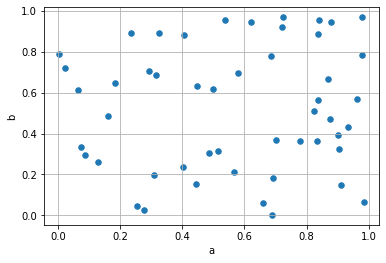

In [4]:
df.plot.scatter(x='a', y='b', s=30, grid=True) #x, y 값 반드시 지정

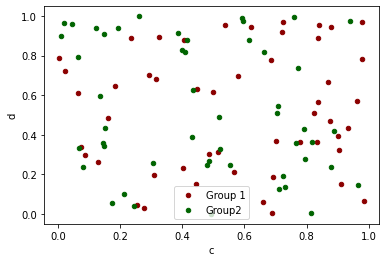

In [5]:
ax = df.plot.scatter(x='a', y='b', color='DarkRed', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group2', ax=ax)

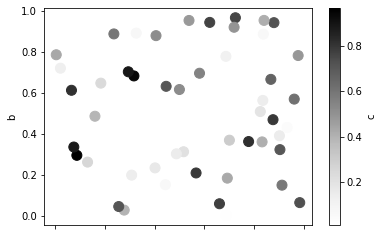

In [6]:
df.plot.scatter(x='a', y='b', c='c', s=100) # 3개의 축 생성, 비교

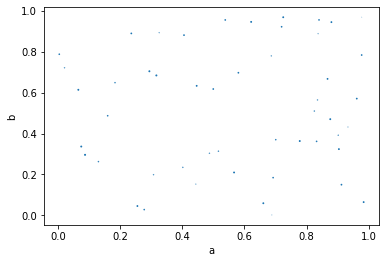

In [9]:
df.plot.scatter(x='a', y='b', s=df['c'])
#c에 따라서 변화를 같이 보고싶다.
#점이 너무 작아서 c에 변화를 준다

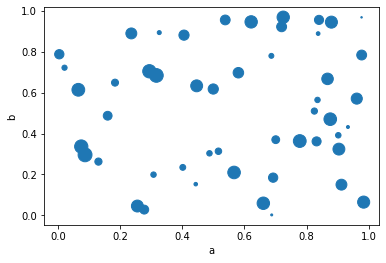

In [7]:
df.plot.scatter(x='a', y='b', s=df['c'] * 200)

#Hexbin Plot 그리기

- 데이터가 클 때 각각의 점을 산점도(Scatter Plot)로 표현할 때의 단점을 보완할 수 있는 그래프

- 육각형 모양의 Bin을 생성하여  그래프로 표현(사각형 형태는 바)
  - 데이터의 크기 비교 가능
- Histogram과 산점도를 혼합한 형태

- x ,y 값을 무조건 지정, 격자 크기도 지정.

- 기본적으로 각 (x,y) 점 주변의 개수에 대한 히스토그램이 계산됨

- C및 reduce_C_function 인수에 값을 전달하여 대체 집계를 지정할 수 있음. 
  C라는건 최대값을 표현해줄지 평균값을 표현해줄지 정할수 있다. 

- C는 각(x,y) 점에서 값을 지정하고 reduce_C_function은 Bin의 모든값을 단일 숫자로 줄이는 하나의 인수함수.

헥스 빈 플랏은 아주 유용하다 스케터플랏의 대안으로 좋다. 그림을 표현하기에 데이터가 너무 밀집되있고 너무 크다면.
 



In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [11]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] 

0      0.790874
1      1.568229
2      0.245230
3     -1.112185
4     -1.724688
         ...   
995    0.070237
996    0.396204
997    1.902195
998    2.002871
999   -3.016339
Name: b, Length: 1000, dtype: float64

In [14]:
df['b'] = df['b'] + np.arange(1000) # index 값 추가 
df['b']

0        -0.639025
1         1.800826
2         4.652264
3         7.722700
4         7.149614
          ...     
995    1989.332842
996    1994.092164
997    1995.395016
998    1995.494547
999    1998.962589
Name: b, Length: 1000, dtype: float64

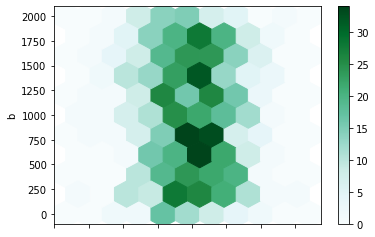

In [15]:
df.plot.hexbin(x='a', y='b', gridsize=10) 
# gridsize=10 : 격자의 size(크기)를 조절 가능 

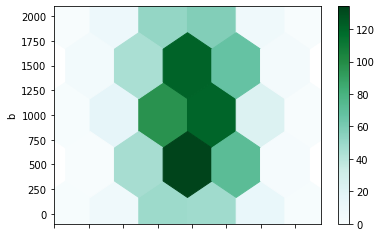

In [16]:
df.plot.hexbin(x='a', y='b', gridsize=5) 
# gridsize=10 : 격자의 size(크기)를 조절 가능

In [17]:
df['z'] = np.random.uniform(0, 3, 1000) # 0~3 범위에서 1000개 무작위 추출
df['z']

0      1.130798
1      2.391084
2      2.981276
3      0.530799
4      2.348797
         ...   
995    2.811876
996    2.550867
997    0.901003
998    0.500067
999    0.663197
Name: z, Length: 1000, dtype: float64

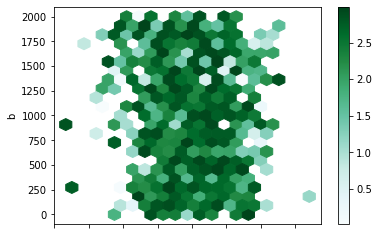

In [18]:
df.plot.hexbin(x='a', y='b', C='z', 
               reduce_C_function=np.max, gridsize=20)

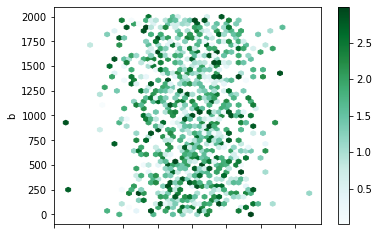

In [19]:
df.plot.hexbin(x='a', y='b', C='z', 
               reduce_C_function=np.median, gridsize=50)
#중앙값으로 그려보자

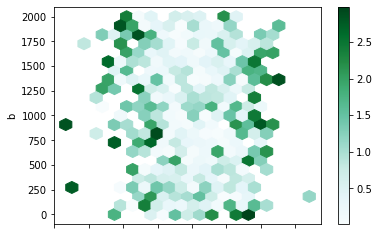

In [20]:
df.plot.hexbin(x='a', y='b', C='z', 
               reduce_C_function=np.min, gridsize=20)

#Pie Plot 그리기
- Seaborn 등 다른 모듈에서는 파이차트를 지원하지 않음
- 면적으로 나타나 오해의 소지가 존재하기 때문
- Data Frame 뒤에 plot.pie()
함수를 출력하면 구현됨.
- 3개에서 5개까지 구분할때 쓰도록
- autopct='%.2f' :소수점 두번째 자리까지 표현


In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl

#Jupyter Nomtebook에 그래프 표시를 위해
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [29]:
series = pd.Series(3 * np.random.rand(4),
                   index=['a', 'b', 'c', 'd'], name='series')
series

a    1.996493
b    0.416489
c    1.997905
d    2.904059
Name: series, dtype: float64

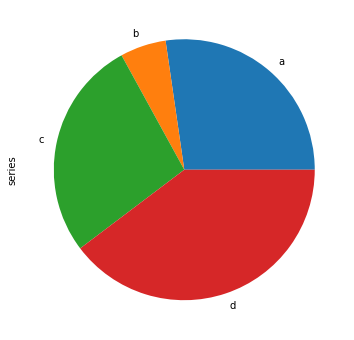

In [30]:
series.plot.pie(figsize=(6, 6))

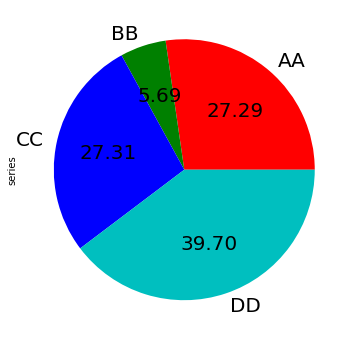

In [31]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], 
                colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', 
                fontsize=20, 
                figsize=(6, 6))

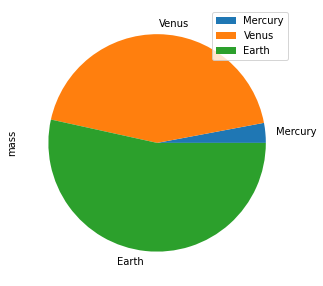

In [32]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

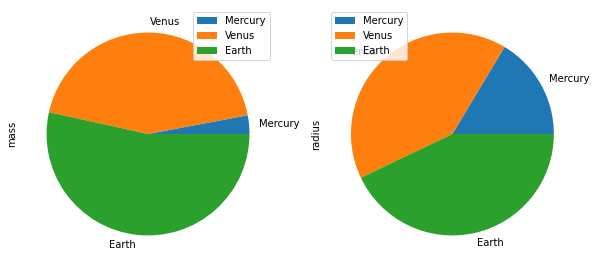

In [33]:
plot = df.plot.pie(subplots=True, figsize=(10, 5))

#Scatter Matrix Plot

In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl

# Jupyter Notebook 에 그래프 표시를 위해
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [35]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
# 1000개의 행과 4개의 열을 random(무작위) 생성
df.head()

,a,b,c,d
0,0.670208,0.333139,0.677811,-0.465147
1,0.979962,0.726559,0.132411,2.490471
2,0.603800,0.686063,1.535415,-0.288153
3,-0.146399,0.025507,0.277245,-2.063949
4,-0.426400,1.085485,-0.495705,0.266577


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02815a3390>,
      dtype=object)

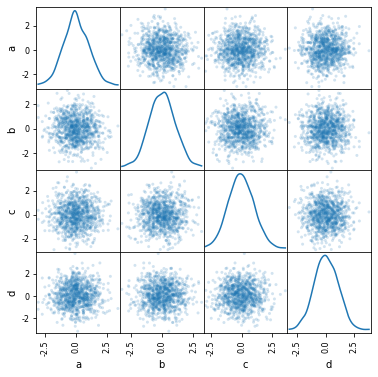

In [36]:
# kde - 커널밀도함수
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
# alpha : float, optional, amount of transparency applied(투명도)
# diagonal=kde 
# diagonal : {'hist', 'kde'} 대각선에 히스토그램 또는 커널밀도함수 그리기
# pick between 'kde' and 'hist' for either Kernel Density Estimation or Histogram

커널 밀도 함수란

- 통계에서 임의 변수의 확률 밀도함수(PDF) (확률 변수의 분포를 나타내는 함수)(가측함수)(특별한 부분에 집합들이 부여된 집합. 가측집합) 를 추정하는 비 모수적 방법

- 히스토그램과 밀접한 관련이 있지만 적절한 커널을 사용하여 매끄럽고 연송성과 같은 속성을 부여 가능

- 이산적으로 끊어져 있는 히스토그램을 부드럽게 연결함

- 원점을 중심으로 대칭이며 적분값이 1인 함수

- 정규분포 또는 가우시안 분포 는 연속 확률 분포의 하나
- 수집 자료의 분포를 근사 하는데에 자주 사용됨
- 이것은 중심 극한 정리(평균에 수렴한다) 에 의하여 독립적인 확률 변수들의 평균은 정규분포에 가까워 지는 성질이 있음.



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [38]:
ser = pd.Series(np.random.randn(1000)) # 1000개의 데이터 생성(무작위)

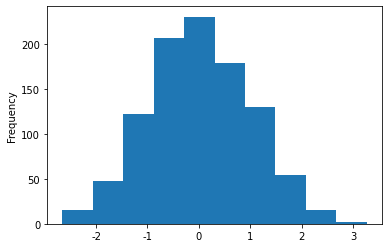

In [40]:
ser.plot.hist()
#히스토그램은 연속함수인데 우리가 계급을 나눈 것 뿐.
#히스토그램과 바 플랏의 다른점은 바는 빈이라는 담는 통이 있어 빈도수만 담을수 있음
#연속형 에는 히스토그램사용 이산형에 바플랏

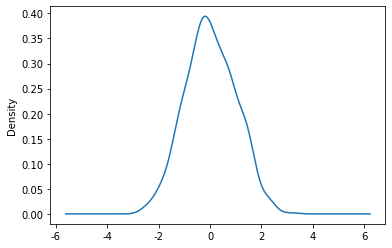

In [41]:
ser.plot.density() # 정규분포 형태의 확률밀도함수

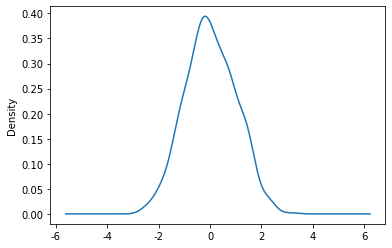

In [42]:
ser.plot.kde()

In [43]:
#둘이 모양이 같다. 둘은 같은거다